In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 12.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=87a978204b2acfa475ff0702b4acb42616b81ec0cdf2aa51e43bd875703af585
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import datetime as DT
import yfinance as yf
from googlesearch import search
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = 20, 10

In [ ]:
def name_convert(self):

    searchval = 'yahoo finance '+self
    link = []
    #limits to the first link
    for url in search(searchval, tld='es', lang='es', stop=1):
        link.append(url)

    link = str(link[0])
    link=link.split("/")
    if link[-1]=='':
        ticker=link[-2]
    else:
        x=link[-1].split('=')
        ticker=x[-1]

    return(ticker)


In [ ]:
def get_stock_data(company_name,start,end):
    
    company=name_convert(company_name)
    print(company)
    tkr = yf.Ticker(company)
    hist = tkr.history(interval="1d",start=start, end=end)
    if(hist.shape[0]< 5):
        return "company not found", 0, 0
    #curr_price = hist.iloc[-1].Close
    #previous_close = hist.iloc[-2].Close
    #percentage_change = (curr_price/previous_close-1)*100
    return company,hist

# Experiments

In [ ]:
TSL = get_stock_data("TESLA","2010-01-01","2021-01-08")
Data = TSL[1]

TSLA


In [ ]:
Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2020-12-31,699.989990,718.719971,691.119995,705.669983,49570900,0,0.0
2021-01-04,719.460022,744.489990,717.190002,729.770020,48638200,0,0.0
2021-01-05,723.659973,740.840027,719.200012,735.109985,32245200,0,0.0


In [ ]:
Data.iloc[10:20]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-07-14,3.588,4.030,3.552,3.968,20976000,0,0.0
2010-07-15,3.988,4.300,3.800,3.978,18699000,0,0.0
2010-07-16,4.140,4.260,4.010,4.128,13106500,0,0.0
2010-07-19,4.274,4.450,4.184,4.382,12432500,0,0.0
2010-07-20,4.370,4.370,4.010,4.060,9126500,0,0.0
2010-07-21,4.132,4.180,3.900,4.044,6262500,0,0.0
2010-07-22,4.100,4.250,4.074,4.200,4789000,0,0.0
2010-07-23,4.238,4.312,4.212,4.258,3268000,0,0.0
2010-07-26,4.300,4.300,4.060,4.190,4611000,0,0.0


# Data Cleaning

In [ ]:
def window_split(Data,win_size,step_size=1):
  X = []
  y = []
  for i in range(Data.shape[0] - win_size):
    X.append(Data.iloc[i:i+win_size:step_size])
    y.append(Data.iloc[i+win_size])
  return np.array(X),np.array(y)

In [ ]:
X,y = window_split(Data.Close,10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = X/1000.0
y = y/1000.0

# Test - Valid - Train Split

In [ ]:
train_ind = 1900
valid_ind = 2450
tesla_growth_ind = 2370

X_train,y_train = X[:train_ind], y[:train_ind]
X_valid, y_valid = X[train_ind:valid_ind],y[train_ind:valid_ind]
X_valid_b, y_valid_b = X[train_ind:tesla_growth_ind],y[train_ind:tesla_growth_ind]
X_valid_a, y_valid_a = X[tesla_growth_ind:valid_ind],y[tesla_growth_ind:valid_ind]
X_test,y_test = X[valid_ind:],y[valid_ind:]

In [ ]:
#getting dates

Data.iloc[2450]

Open            9.546000e+01
High            1.027380e+02
Low             9.480000e+01
Close           1.010000e+02
Volume          1.144760e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2020-03-24 00:00:00, dtype: float64

# Training

## Tree models

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

## Gradient Boosting

In [ ]:
reg = GradientBoostingRegressor(n_estimators=100)
reg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
plot_data = pd.DataFrame()
plot_data['Train True'] = y_train*1000
plot_data['Train Predicted'] = reg.predict(X_train)*1000
plot_data.index = Data.iloc[:1900].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('Gradient Boosting - Train Data')

Text(0.5, 1.0, 'Gradient Boosting - Validation Data')

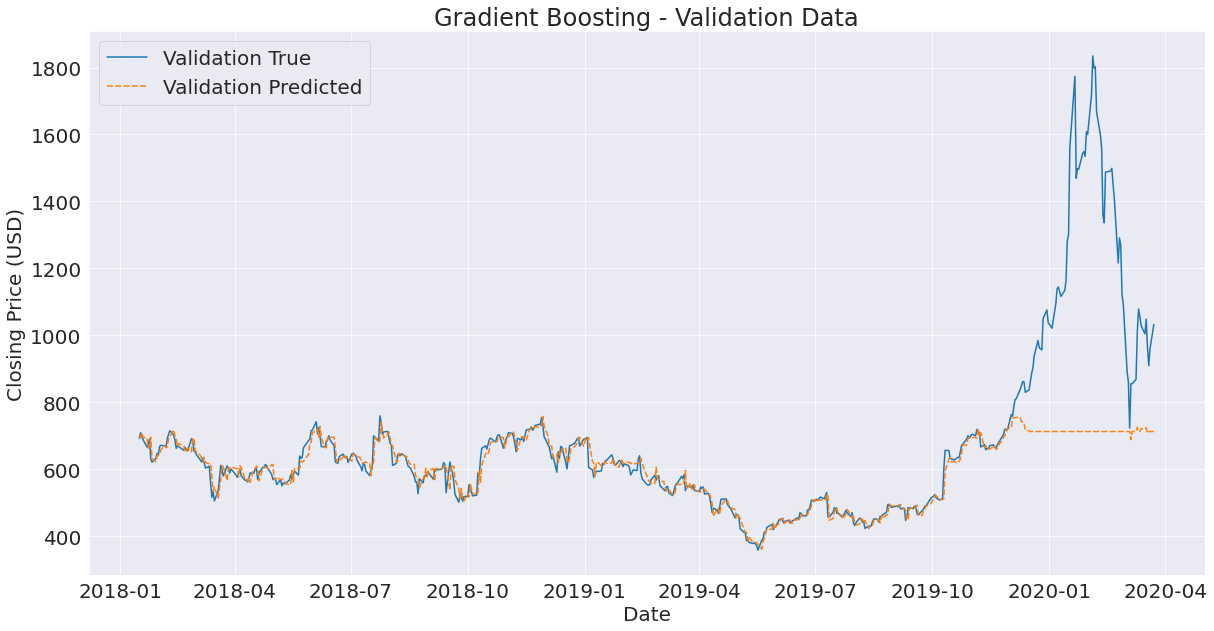

In [ ]:
plot_data = pd.DataFrame()
plot_data['Validation True'] = y_valid*1000
plot_data['Validation Predicted'] = reg.predict(X_valid)*1000
plot_data.index = Data.iloc[1900:2450].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('Gradient Boosting - Validation Data')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Text(0, 0.5, 'Closing Price (USD)')

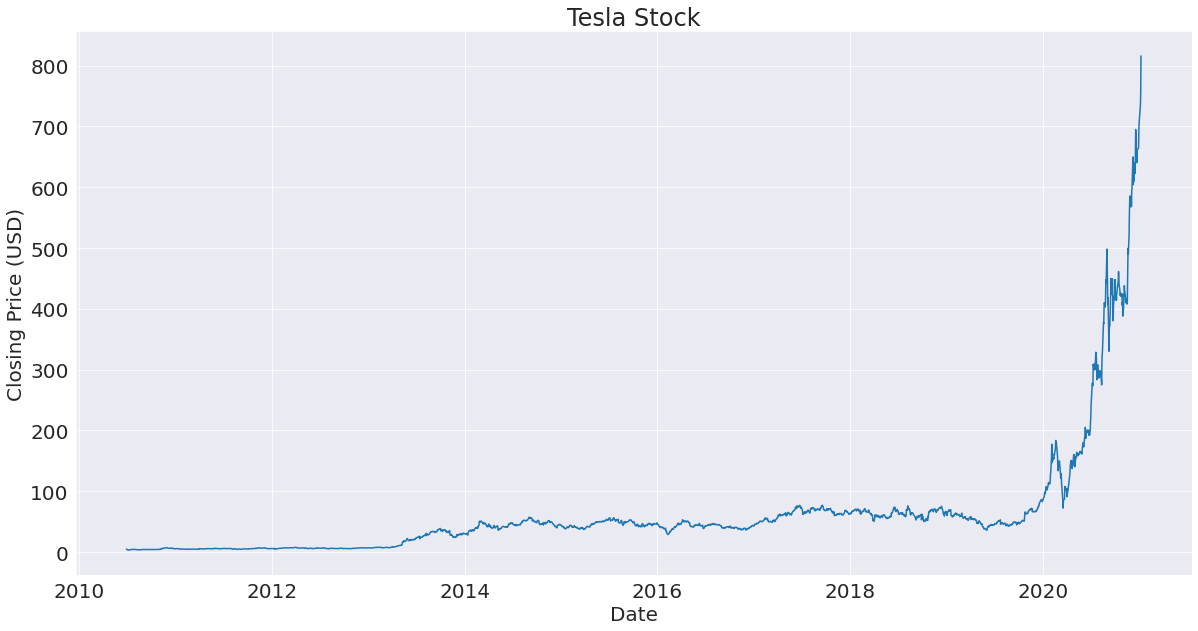

In [ ]:
plt.plot(Data.Close)
plt.title('Tesla Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')

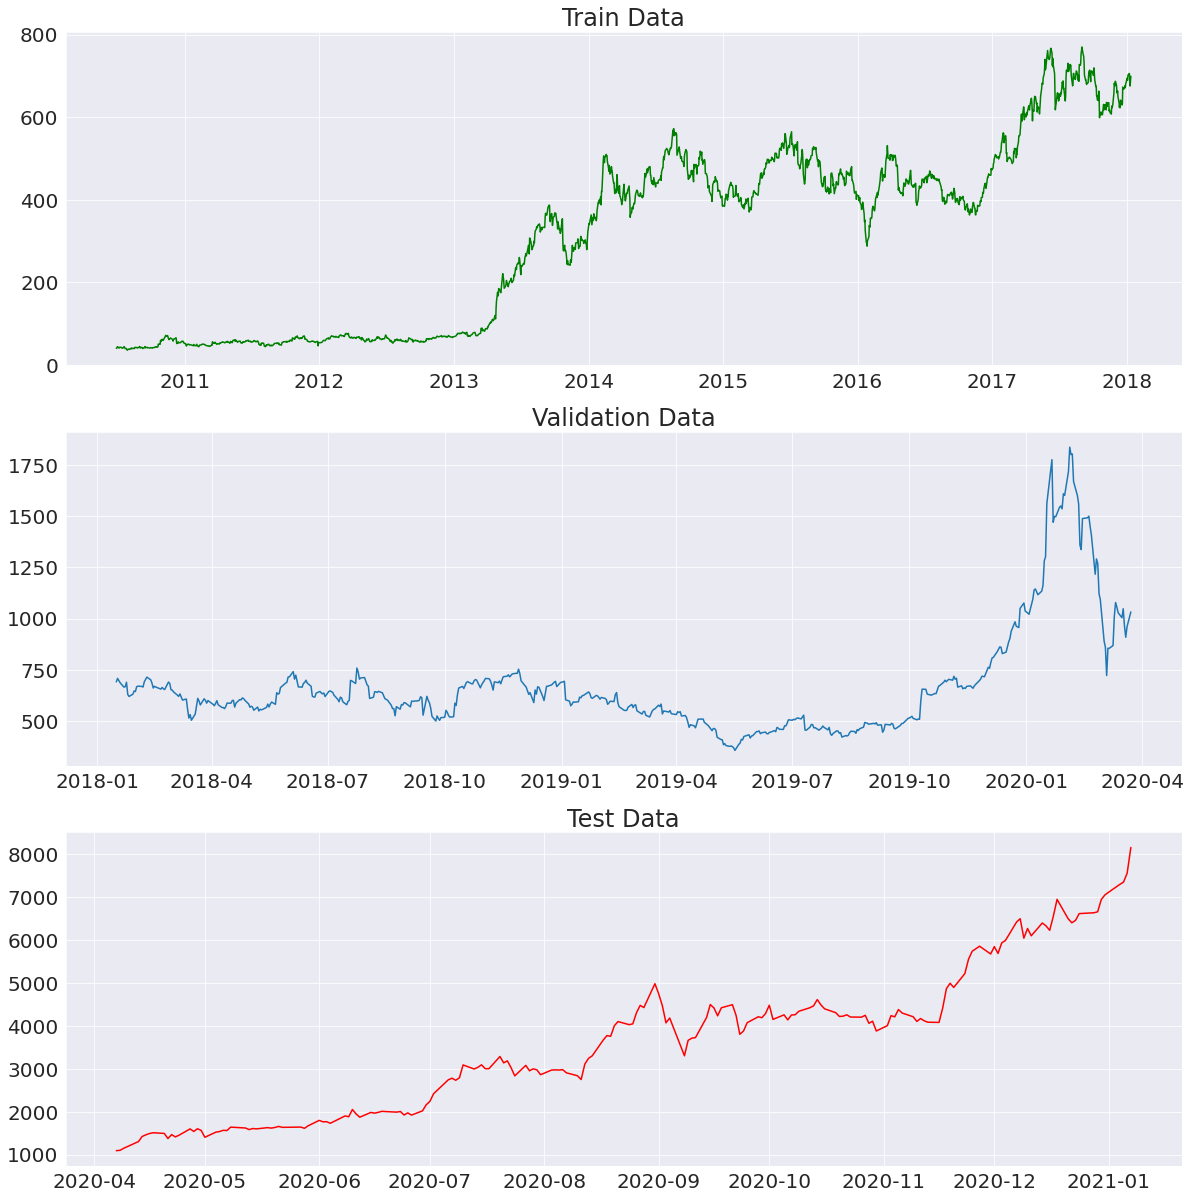

In [ ]:
fig,a =  plt.subplots(3,1)
#Train 
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
a[0].plot(Data.iloc[:1900].index,y_train*1000, c='g')
a[0].set_title('Train Data')
a[1].plot(Data.iloc[1900:2450].index,y_valid*1000)
a[1].set_title('Validation Data')
a[2].plot(Data.iloc[2460:].index,y_test*1000,c='red')
a[2].set_title('Test Data')
fig.subplots_adjust(top=1.7)


#for (m,n), subplot in np.ndenumerate(a):
#    subplot.set_ylim(0,200)

In [ ]:
 
import pandas as pd
plot_data = pd.DataFrame()
plot_data['']
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('Random Forest - Train Data')
#plt.legend(fontsize='x-large', title_fontsize='40')

Text(0.5, 1.0, 'Random Forest - Train Data')

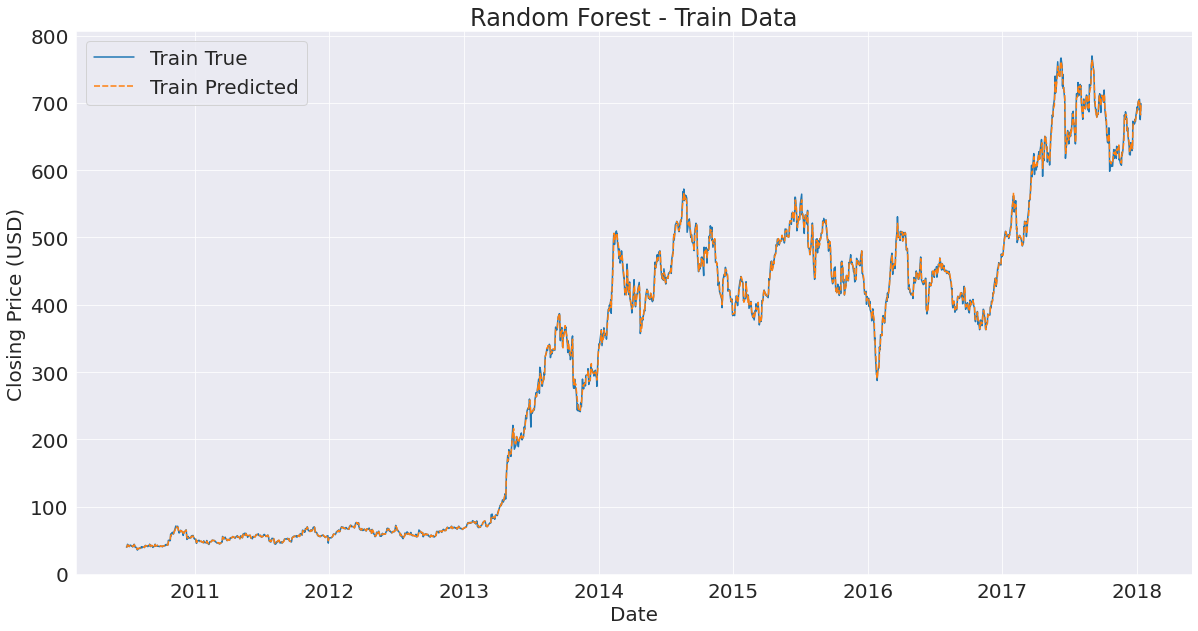

In [ ]:
 
plot_data = pd.DataFrame()
plot_data['Train True'] = y_train*1000
plot_data['Train Predicted'] = reg.predict(X_train)*1000
plot_data.index = Data.iloc[:1900].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('Random Forest - Train Data')
#plt.legend(fontsize='x-large', title_fontsize='40')

Text(0.5, 1.0, 'Random Forest - Validation Data')

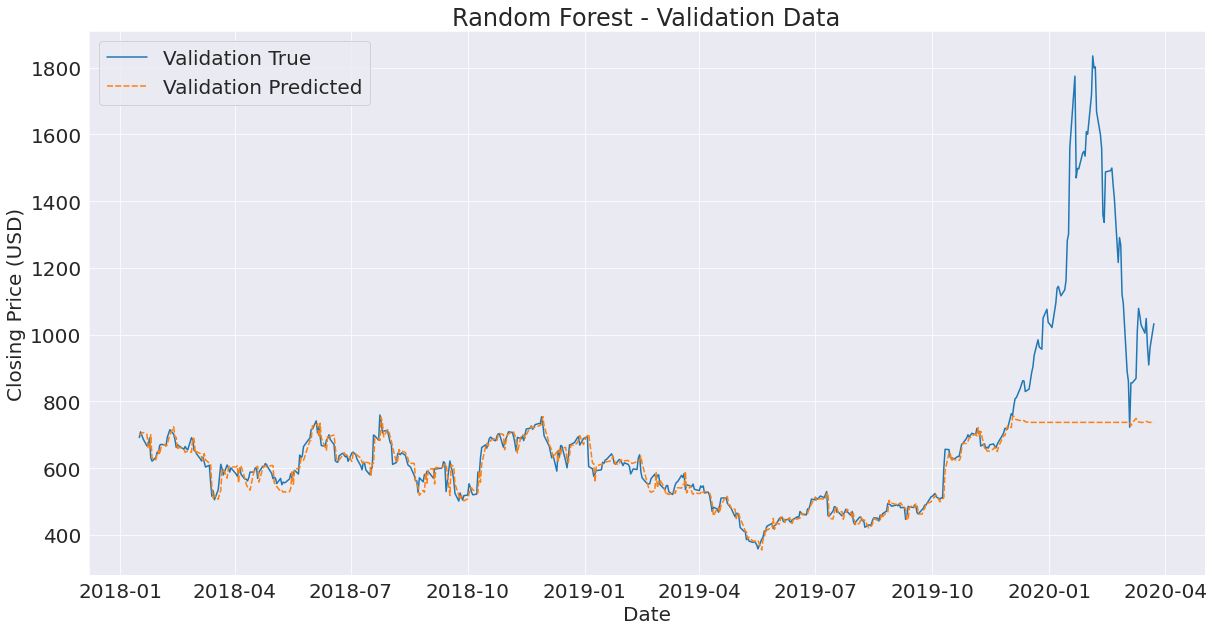

In [ ]:
plot_data = pd.DataFrame()
plot_data['Validation True'] = y_valid*1000
plot_data['Validation Predicted'] = reg.predict(X_valid)*1000
plot_data.index = Data.iloc[1900:2450].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('Random Forest - Validation Data')

## MLP

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
reg = MLPRegressor(random_state=1, max_iter=500)
reg.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

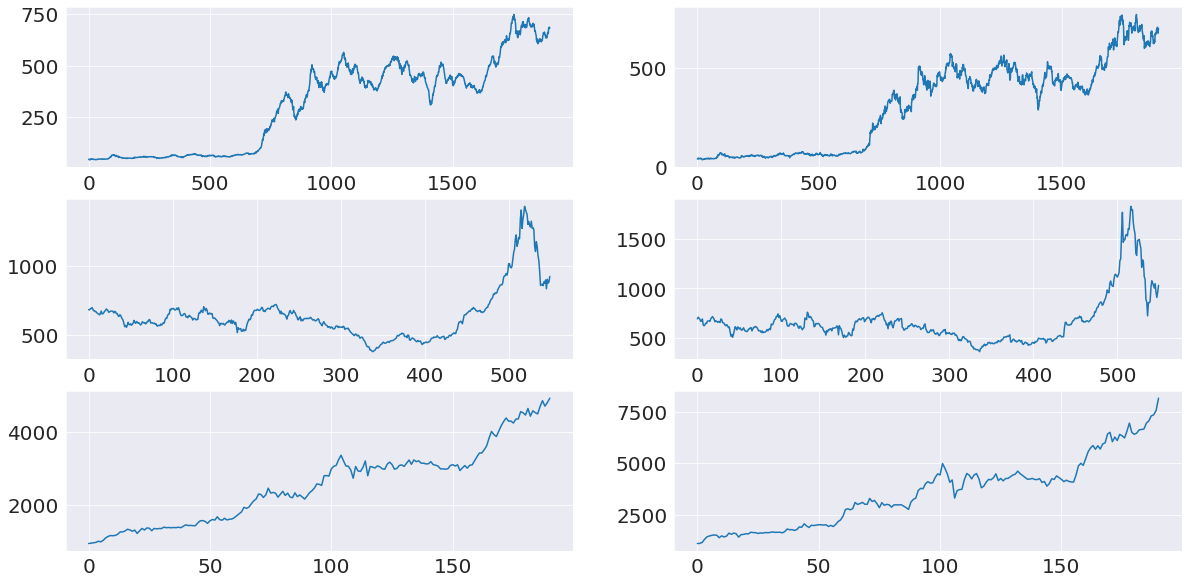

In [ ]:
fig,a =  plt.subplots(3,2)
a[0][0].plot(reg.predict(X_train)*1000)
a[0][1].plot(y_train*1000)
a[1][0].plot(reg.predict(X_valid)*1000)
a[1][1].plot(y_valid*1000)
a[2][0].plot(reg.predict(X_test)*1000)
a[2][1].plot(y_test*1000)

Text(0.5, 1.0, 'MLP - Train Data')

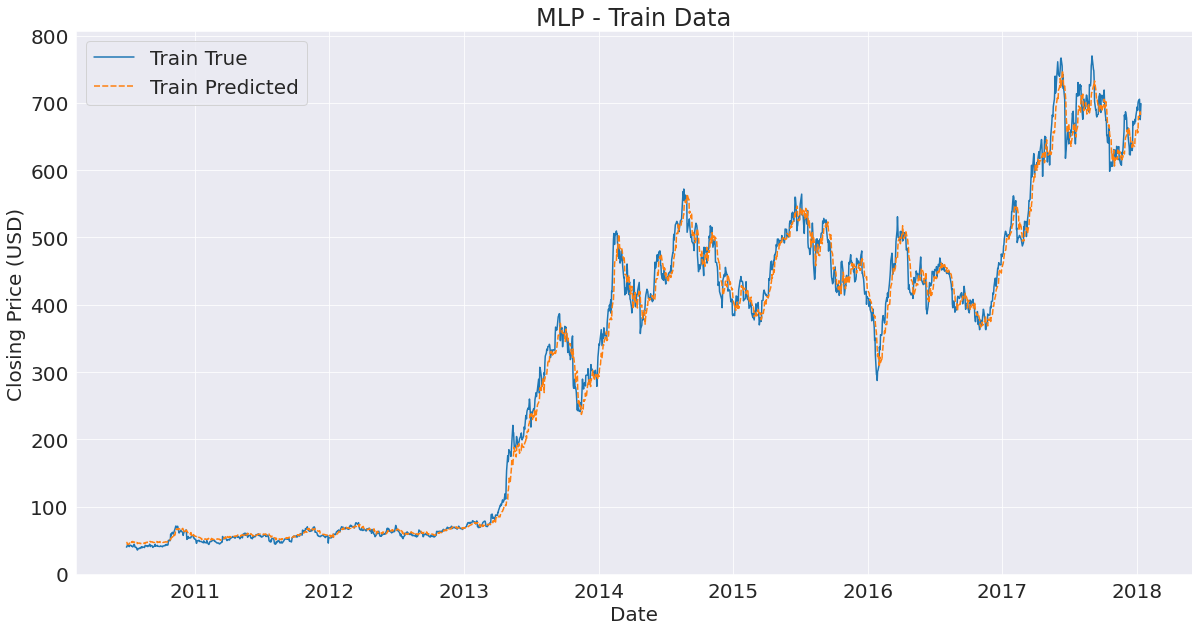

In [ ]:
plot_data = pd.DataFrame()
plot_data['Train True'] = y_train*1000
plot_data['Train Predicted'] = reg.predict(X_train)*1000
plot_data.index = Data.iloc[:1900].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('MLP - Train Data')

Text(0.5, 1.0, 'MLP - Validation Data')

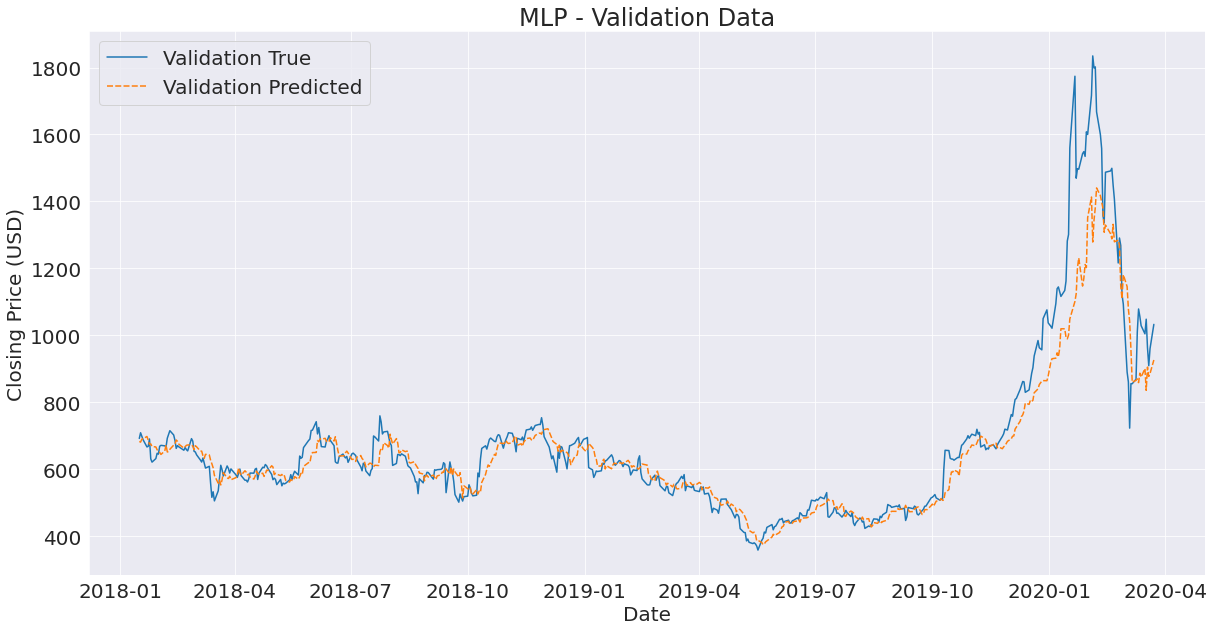

In [ ]:
plot_data = pd.DataFrame()
plot_data['Validation True'] = y_valid*1000
plot_data['Validation Predicted'] = reg.predict(X_valid)*1000
plot_data.index = Data.iloc[1900:2450].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('MLP - Validation Data')

## Torch

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.fc1 = nn.Linear(in_features = hidden_layer_size, out_features = hidden_layer_size)
        self.act1 = nn.ReLU()

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(  self.act1(  self.fc1(        lstm_out.view(len(input_seq), -1))  )    )
        return predictions[-1]

In [ ]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

In [ ]:
train_ind = 1900
valid_ind = 2450

X_train,y_train = X[:train_ind], y[:train_ind]
X_valid, y_valid = X[train_ind:valid_ind],y[train_ind:valid_ind]
X_test,y_test = X[valid_ind:],y[valid_ind:]

In [ ]:
device = torch.device('cuda:0')
model = LSTM().to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
epochs = 40
model.train()
for i in range(epochs):
    for seq, labels in zip(X_train,y_train):
        seq = seq.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size, device = device),
                        torch.zeros(1, 1, model.hidden_layer_size, device=device))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%2 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [ ]:
def sign_change(y_predicted, y_true):
    y_predicted = np.array(y_predicted)
    real_change = (y_true[1:] - y_true[0:-1]).sign()
    predicted_change = np.sign( y_predicted[1:] - y_predicted[0:-1])
    return real_change, predicted_change

In [ ]:
def pred_nn(data):
  model.eval()
  res = []

  for samp in data:
        with torch.no_grad():
          model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                          torch.zeros(1, 1, model.hidden_layer_size))
          res.append(model(samp).item())
  return np.array(res)

In [ ]:
train_pred = pred_nn(X_train.to(device))
valid_pred = pred_nn(X_valid.to(device))
test_pred = pred_nn(X_test.to(device))


In [ ]:
real_change, predicted_change = sign_change(train_pred, y_train)
print((real_change.detach().cpu().numpy() == predicted_change).sum() / len(real_change))

In [ ]:
real_change, predicted_change = sign_change(test_pred, y_test)
print((real_change.detach().cpu().numpy() == predicted_change).sum() / len(real_change))

In [ ]:
predicted_change

In [ ]:
def pred_sequence(data):
    model.eval()
    res = []
    samp = data[0]
    print(type(samp))
    for i in range(len(data)):
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                            torch.zeros(1, 1, model.hidden_layer_size))
            res.append(model(samp).item())
            samp[:-1] = samp[:-1].clone()
            samp[-1] = res[-1]
    return np.array(res)

In [ ]:
train_pred = pred_sequence(X_train.to(device))
valid_pred = pred_sequence(X_valid.to(device))
test_pred = pred_sequence(X_test.to(device))

fig,a =  plt.subplots(3,2)
a[0][0].plot(train_pred*1000)
a[0][1].plot(y_train*1000)
a[1][0].plot(valid_pred*1000)
a[1][1].plot(y_valid*1000)
a[2][0].plot(test_pred*1000)
a[2][1].plot(y_test*1000)

In [ ]:
plot_data = pd.DataFrame()
plot_data['Train True'] = y_train*100
plot_data['Train Predicted'] = train_pred*100
plot_data.index = Data.iloc[:1900].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('LSTM Without Regularization - Train Data')

In [ ]:
plot_data = pd.DataFrame()
plot_data['Validation True'] = y_valid*100
plot_data['Validation Predicted'] = valid_pred*100
plot_data.index = Data.iloc[1900:2450].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('LSTM Without Regularization - Validation Data')

## Regularization

In [ ]:
class LSTM_regularized(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=199, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size, dropout = 0.1)

        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.dropout(self.linear(lstm_out.view(len(input_seq), -1)))
        return predictions[-1]

In [ ]:
device = torch.device('cuda:0')
model_r = LSTM_regularized().to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model_r.parameters(), lr=0.0001)

In [ ]:
epochs = 10
model_r.train()
for i in range(epochs):
    for seq, labels in zip(X_train,y_train):
        seq = seq.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        model_r.hidden_cell = (torch.zeros(1, 1, model_r.hidden_layer_size, device = device),
                        torch.zeros(1, 1, model_r.hidden_layer_size, device=device))

        y_pred = model_r(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%2 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [ ]:
def pred_nn(model, data):
  model.eval()
  res = []

  for samp in data:
        with torch.no_grad():
          model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                          torch.zeros(1, 1, model.hidden_layer_size))
          res.append(model(samp).item())
  return np.array(res)

train_pred = pred_nn( model_r, X_train.to(device))
valid_pred = pred_nn(model_r,X_valid.to(device))
test_pred = pred_nn(model_r, X_test.to(device))
fig,a =  plt.subplots(3,2)
a[0][0].plot(train_pred*1000)
a[0][1].plot(y_train*1000)
a[1][0].plot(valid_pred*1000)
a[1][1].plot(y_valid*1000)
a[2][0].plot(test_pred*1000)
a[2][1].plot(y_test*1000)

In [ ]:
plot_data = pd.DataFrame()
plot_data['Train True'] = y_train*1000
plot_data['Train Predicted'] = train_pred*1000
plot_data.index = Data.iloc[:1900].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('LSTM - Train Data')

In [ ]:
plot_data = pd.DataFrame()
plot_data['Validation True'] = y_valid*1000
plot_data['Validation Predicted'] = valid_pred*1000
plot_data.index = Data.iloc[1900:2450].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('LSTM - Validation Data')

In [ ]:
plot_data = pd.DataFrame()
plot_data['Validation True'] = y_test*1000
plot_data['Validation Predicted'] = test_pred*1000
plot_data.index = Data.iloc[2460:].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('LSTM - Test Data')

In [ ]:

range_debug = 20
def pred_sequence(model, data, pred_n = 1):
    model.eval()
    res = []
    samp = data[0]
    w_size = len(data[0])
    print(type(samp))
    #for i in range(len(data) -1):
    for i in range(range_debug):
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                            torch.zeros(1, 1, model.hidden_layer_size))
            res.append(model(samp).item())
            samp[:w_size - pred_n] = data[i+1][:w_size - pred_n] 
            samp[w_size - pred_n:-1] = samp[w_size - pred_n + 1:].clone()
            samp[-1] = res[-1] # data[i+1][-1]
            if i < 2:
                print(data[i+1][-1] * 1000, res[-1]*1000 )
    return np.array(res)

In [ ]:
train_pred = pred_sequence(model_r, X_train.to(device))
valid_pred = pred_sequence(model_r, X_valid.to(device))
test_pred = pred_sequence(model_r, X_test.to(device))

fig,a =  plt.subplots(3,2)
a[0][0].plot(train_pred*1000)
a[0][1].plot((y_train*1000)[:range_debug])
a[1][0].plot(valid_pred*1000)
a[1][1].plot((y_valid*1000)[:range_debug])
a[2][0].plot(test_pred*1000)
a[2][1].plot((y_test*1000)[:range_debug])

In [ ]:
plot_data = pd.DataFrame()
plot_data['Train True'] = y_train*1000
plot_data['Train Predicted'] = train_pred*1000
plot_data.index = Data.iloc[:1900].index
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=plot_data)
plt.ylabel('Closing Price (USD)')
plt.title('MLP - Train Data')